In [1]:
import json
import pandas as pd
import numpy as np
import re
import warnings
import collections
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
busi = pd.read_json('E:/Fall_2023/stat628/module3/data/yelp_Fall2023/business.json', lines=True)

In [7]:
busi.shape

(150346, 14)

### filter all bars

In [3]:
#busi1 = busi[(busi['state'].str.contains('IL')) & (busi['categories'].str.contains('Restaurants'))]
busi1 = busi[busi['categories'].str.contains('Bars', na= False)]
index = np.full(busi1.shape[0], True)
for i in range(busi1.shape[0]):
    if busi1.iloc[i, -3] is None:
        index[i] = False
busi1 = busi1[index]
busi1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,AB,T6J 7C2,53.463917,-113.494702,3.0,35,1,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Japanese, Restaurants, Steakhouses, Sushi Bars","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
150291,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,ID,83706,43.603368,-116.250063,2.5,55,0,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","American (Traditional), Nightlife, Bars, Resta...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
150292,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
150323,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,1,"{'BikeParking': 'True', 'Alcohol': 'u'full_bar...","Bars, Gastropubs, Sandwiches, Nightlife, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [433]:
#busi1.to_json('E:/Fall_2023/stat628/module3/IL_restaurants.json')

In [4]:
attrs = []
for i in range(busi1.shape[0]):
    attr = [j for j in busi1.iloc[i, -3].keys()] if busi1.iloc[i, -3] is not None else []
    for a in attr:
        attrs.append(a)
aa = collections.Counter(attrs)  ### build a dictionary: letter -> # of appear
sorted_aa = aa.most_common()

In [6]:
14225 * 0.7

9957.5

In [7]:
consider = sorted_aa[:14]
consider

[('BusinessParking', 13114),
 ('BusinessAcceptsCreditCards', 12815),
 ('OutdoorSeating', 12413),
 ('RestaurantsPriceRange2', 12268),
 ('HasTV', 12115),
 ('Ambience', 11840),
 ('Alcohol', 11804),
 ('RestaurantsGoodForGroups', 11360),
 ('RestaurantsReservations', 11285),
 ('RestaurantsTakeOut', 11244),
 ('BikeParking', 11045),
 ('WiFi', 10842),
 ('RestaurantsDelivery', 10839),
 ('NoiseLevel', 10160)]

In [9]:
park = []
for i in range(1):#busi1.shape[0]):
    keys = [j for j in busi1.iloc[i, -3].keys()]
    if 'BusinessParking' in keys:
        #print(type(bar.iloc[i, -3]['BusinessParking']))
        value = eval(busi1.iloc[i, -3]['BusinessParking'])
        if type(value) == dict:
            p = [j for j in value.keys()]
            for j in p:
                park.append(j)
park_lst = np.unique(park)
park_lst

array(['garage', 'lot', 'street', 'valet', 'validated'], dtype='<U9')

In [10]:
ambience = []
for i in range(busi1.shape[0]):
    keys = [j for j in busi1.iloc[i, -3].keys()]
    if 'Ambience' in keys:
        value = eval(busi1.iloc[i, -3]['Ambience'])
        if type(value) == dict:
            p = [j for j in value.keys()]
            for j in p:
                ambience.append(j)
am_lst = np.unique(ambience)
am_lst 

array(['casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale'], dtype='<U8')

In [12]:
columns = ['business_id', 'stars']
for i in range(len(consider)):
    if consider[i][0] == 'BusinessParking':
        for p in park_lst:
            columns.append(p)
    elif consider[i][0] == 'Ambience':
        for p in am_lst:
            columns.append(p)
    else:
        columns.append(consider[i][0])
for i in ['name', 'city', 'state', 'is_open']:
    columns.append(i)
df1 = pd.DataFrame(columns = columns)
df1

,business_id,stars,garage,lot,street,valet,validated,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsPriceRange2,...,RestaurantsReservations,RestaurantsTakeOut,BikeParking,WiFi,RestaurantsDelivery,NoiseLevel,name,city,state,is_open


In [16]:
for i in range(busi1.shape[0]):
    lst = pd.Series(index = columns)
    lst['business_id'] = busi1.iloc[i, 0]
    lst['stars'] = busi1.iloc[i, 8]
    lst['name'] = busi1.iloc[i, 1]
    lst['city'] = busi1.iloc[i, 3]
    lst['state'] = busi1.iloc[i, 4]
    lst['is_open'] = busi1.iloc[i, 10]
    for con in range(len(consider)):
        if consider[con][0] in busi1.iloc[i, -3].keys():
            if consider[con][0] == 'BusinessParking':
                if type(eval(busi1.iloc[i, -3][consider[con][0]])) == dict:
                    for p in [j for j in eval(busi1.iloc[i, -3][consider[con][0]]).keys()]:
                        lst[p] = eval(busi1.iloc[i, -3][consider[con][0]])[p] 
            elif consider[con][0] == 'Ambience':
                if type(eval(busi1.iloc[i, -3][consider[con][0]])) == dict:
                    for p in [j for j in eval(busi1.iloc[i, -3][consider[con][0]]).keys()]:
                        lst[p] = eval(busi1.iloc[i, -3][consider[con][0]])[p]
            else:
                if consider[con][0] in busi1.iloc[i, -3].keys():
                    lst[consider[con][0]] = busi1.iloc[i, -3][consider[con][0]]
    row = pd.Series(lst, index = columns)
    df1 = df1.append(row, ignore_index = True)

In [17]:
df1

,business_id,stars,garage,lot,street,valet,validated,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsPriceRange2,...,RestaurantsReservations,RestaurantsTakeOut,BikeParking,WiFi,RestaurantsDelivery,NoiseLevel,name,city,state,is_open
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,False,True,False,False,False,True,True,1,...,False,True,NaN,u'free',False,u'average',Tsevi's Pub And Grill,Affton,MO,0
1,MUTTqe8uqyMdBl186RmNeA,4.0,None,False,True,False,None,True,True,2,...,True,True,NaN,'free',True,u'average',Tuna Bar,Philadelphia,PA,1
2,WKMJwqnfZKsAae75RMP6jA,4.0,False,True,True,False,False,NaN,False,2,...,False,True,NaN,u'free',False,u'average',Roast Coffeehouse and Wine Bar,Edmonton,AB,0
3,QdN72BWoyFypdGJhhI5r7g,4.0,None,False,True,False,None,True,False,2,...,False,True,True,u'free',True,u'average',Bar One,Philadelphia,PA,0
4,lk9IwjZXqUMqqOhM774DtQ,3.5,True,False,False,False,False,True,True,2,...,False,True,True,'free',True,u'average',Caviar & Bananas,Nashville,TN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14220,Rn3DtOiuJtc3whFySWXs5Q,3.0,False,True,False,False,False,True,False,3,...,True,True,False,u'free',True,u'very_loud',Japanese Village,Edmonton,AB,1
14221,-R9t30RvsG-Rtiq63yuEmg,2.5,False,True,False,False,False,True,True,2,...,True,True,True,u'no',False,u'loud',Crescent No Lawyers Bar-Grill,Boise,ID,0
14222,esBGrrmuZzSiECyRBoKvvA,4.5,None,False,True,False,False,NaN,True,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Colony Grill - St. Petersburg,St. Petersburg,FL,1
14223,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,True,False,True,False,False,True,None,2,...,False,None,True,u'free',None,u'average',Bittercreek Alehouse,Boise,ID,1


In [18]:
df1.to_csv('E:/Fall_2023/stat628/module3/attempt2/bars.csv', index = False)

### feature engineering

In [25]:
df1 = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/bars.csv')

In [26]:
df1

,business_id,stars,garage,lot,street,valet,validated,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsPriceRange2,...,RestaurantsReservations,RestaurantsTakeOut,BikeParking,WiFi,RestaurantsDelivery,NoiseLevel,name,city,state,is_open
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,False,True,False,False,False,True,True,1,...,False,True,NaN,u'free',False,u'average',Tsevi's Pub And Grill,Affton,MO,0
1,MUTTqe8uqyMdBl186RmNeA,4.0,NaN,False,True,False,NaN,True,True,2,...,True,True,NaN,'free',True,u'average',Tuna Bar,Philadelphia,PA,1
2,WKMJwqnfZKsAae75RMP6jA,4.0,False,True,True,False,False,NaN,False,2,...,False,True,NaN,u'free',False,u'average',Roast Coffeehouse and Wine Bar,Edmonton,AB,0
3,QdN72BWoyFypdGJhhI5r7g,4.0,NaN,False,True,False,NaN,True,False,2,...,False,True,True,u'free',True,u'average',Bar One,Philadelphia,PA,0
4,lk9IwjZXqUMqqOhM774DtQ,3.5,True,False,False,False,False,True,True,2,...,False,True,True,'free',True,u'average',Caviar & Bananas,Nashville,TN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14220,Rn3DtOiuJtc3whFySWXs5Q,3.0,False,True,False,False,False,True,False,3,...,True,True,False,u'free',True,u'very_loud',Japanese Village,Edmonton,AB,1
14221,-R9t30RvsG-Rtiq63yuEmg,2.5,False,True,False,False,False,True,True,2,...,True,True,True,u'no',False,u'loud',Crescent No Lawyers Bar-Grill,Boise,ID,0
14222,esBGrrmuZzSiECyRBoKvvA,4.5,NaN,False,True,False,False,NaN,True,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Colony Grill - St. Petersburg,St. Petersburg,FL,1
14223,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,True,False,True,False,False,True,None,2,...,False,None,True,u'free',None,u'average',Bittercreek Alehouse,Boise,ID,1


In [27]:
for i in [2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23,24,26]:
    for j in range(df1.shape[0]):
        if (df1.iloc[j, i] == False) or (df1.iloc[j, i] == 'False'):
            df1.iloc[j, i] = 0
        elif (df1.iloc[j, i] == True) or (df1.iloc[j, i] == 'True'):
            df1.iloc[j, i] = 1
        else:
            df1.iloc[j, i] = 0

In [28]:
alcohol = []
for i in df1['Alcohol']:
    if type(i) == str:
        alcohol.append(eval(i))
alcohol = [i for i in alcohol if type(i) == str]
alcohol = np.unique(alcohol)
alcohol

array(['beer_and_wine', 'full_bar', 'none'], dtype='<U13')

In [29]:
i = 20
for j in range(df1.shape[0]):
    if type(df1.iloc[j, i]) == str:
        if eval(df1.iloc[j, i]) == 'full_bar':
            df1.iloc[j, i] = 2
        elif eval(df1.iloc[j, i]) == 'beer_and_wine':
            df1.iloc[j, i] = 1
        else:
            df1.iloc[j, i] = 0
    else:
        df1.iloc[j, i] = 0

In [30]:
WiFi = []
for i in df1['WiFi']:
    if type(i) == str:
        WiFi.append(eval(i))
WiFi = [i for i in WiFi if type(i) == str]
WiFi = np.unique(WiFi)
WiFi

array(['free', 'no', 'paid'], dtype='<U4')

In [31]:
i = -7
for j in range(df1.shape[0]):
    if type(df1.iloc[j, i]) == str:
        if eval(df1.iloc[j, i]) == 'free':
            df1.iloc[j, i] = 2
        elif eval(df1.iloc[j, i]) == 'paid':
            df1.iloc[j, i] = 1
        else:
            df1.iloc[j, i] = 0
    else:
        df1.iloc[j, i] = 0

In [32]:
Noisy = []
for i in df1['NoiseLevel']:
    if type(i) == str:
        Noisy.append(eval(i))
Noisy = [i for i in Noisy if type(i) == str]
Noisy = np.unique(Noisy)
Noisy

array(['average', 'loud', 'quiet', 'very_loud'], dtype='<U9')

In [33]:
i = -5
for j in range(df1.shape[0]):
    if type(df1.iloc[j, i]) == str:
        if eval(df1.iloc[j, i]) == 'very_loud':
            df1.iloc[j, i] = 4
        elif eval(df1.iloc[j, i]) == 'loud':
            df1.iloc[j, i] = 3
        elif eval(df1.iloc[j, i]) == 'average':
            df1.iloc[j, i] = 2
        elif eval(df1.iloc[j, i]) == 'quiet':
            df1.iloc[j, i] = 1
        else:
            df1.iloc[j, i] = 0
    else:
        df1.iloc[j, i] = 0

In [34]:
ranges = []
for i in df1['RestaurantsPriceRange2']:
    if type(i) == str:
        if i != 'None':
            ranges.append(i)

ranges = [int(i) for i in ranges]# if type(i) == str]
ranges = np.unique(ranges)
ranges

array([1, 2, 3, 4])

In [35]:
i = 9
for j in range(df1.shape[0]):
    if type(df1.iloc[j, i]) == str:
        if df1.iloc[j, i] == '4':
            df1.iloc[j, i] = 4
        elif df1.iloc[j, i] == '3':
            df1.iloc[j, i] = 3
        elif df1.iloc[j, i] == '2':
            df1.iloc[j, i] = 2
        elif df1.iloc[j, i] == '1':
            df1.iloc[j, i] = 1
        else:
            df1.iloc[j, i] = 0
    else:
        df1.iloc[j, i] = 0

In [36]:
df1

,business_id,stars,garage,lot,street,valet,validated,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsPriceRange2,...,RestaurantsReservations,RestaurantsTakeOut,BikeParking,WiFi,RestaurantsDelivery,NoiseLevel,name,city,state,is_open
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,0,1,0,0,0,1,1,1,...,0,1,0,2,0,2,Tsevi's Pub And Grill,Affton,MO,0
1,MUTTqe8uqyMdBl186RmNeA,4.0,0,0,1,0,0,1,1,2,...,1,1,0,2,1,2,Tuna Bar,Philadelphia,PA,1
2,WKMJwqnfZKsAae75RMP6jA,4.0,0,1,1,0,0,0,0,2,...,0,1,0,2,0,2,Roast Coffeehouse and Wine Bar,Edmonton,AB,0
3,QdN72BWoyFypdGJhhI5r7g,4.0,0,0,1,0,0,1,0,2,...,0,1,1,2,1,2,Bar One,Philadelphia,PA,0
4,lk9IwjZXqUMqqOhM774DtQ,3.5,1,0,0,0,0,1,1,2,...,0,1,1,2,1,2,Caviar & Bananas,Nashville,TN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14220,Rn3DtOiuJtc3whFySWXs5Q,3.0,0,1,0,0,0,1,0,3,...,1,1,0,2,1,4,Japanese Village,Edmonton,AB,1
14221,-R9t30RvsG-Rtiq63yuEmg,2.5,0,1,0,0,0,1,1,2,...,1,1,1,0,0,3,Crescent No Lawyers Bar-Grill,Boise,ID,0
14222,esBGrrmuZzSiECyRBoKvvA,4.5,0,0,1,0,0,0,1,2,...,0,0,0,0,0,0,Colony Grill - St. Petersburg,St. Petersburg,FL,1
14223,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,1,0,1,0,0,1,0,2,...,0,0,1,2,0,2,Bittercreek Alehouse,Boise,ID,1


In [37]:
df1.to_csv('E:/Fall_2023/stat628/module3/attempt2/barsAttr.csv', index = False)

In [2]:
df1 = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/barsAttr.csv')

In [39]:
NoneUS = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/clean_state.csv')

In [40]:
### filter nonUS
len(set(df1['business_id']) & set(NoneUS['business_id']))

577

In [41]:
df1 = df1[~df1['business_id'].isin(NoneUS['business_id'])]

In [42]:
df1.to_csv('E:/Fall_2023/stat628/module3/attempt2/barsAttr.csv', index = False)

### Model

### without standarization

In [43]:
df1.head()

,business_id,stars,garage,lot,street,valet,validated,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsPriceRange2,...,RestaurantsReservations,RestaurantsTakeOut,BikeParking,WiFi,RestaurantsDelivery,NoiseLevel,name,city,state,is_open
0,k0hlBqXX-Bt0vf1op7Jr1w,3.0,0,1,0,0,0,1,1,1,...,0,1,0,2,0,2,Tsevi's Pub And Grill,Affton,MO,0
1,MUTTqe8uqyMdBl186RmNeA,4.0,0,0,1,0,0,1,1,2,...,1,1,0,2,1,2,Tuna Bar,Philadelphia,PA,1
3,QdN72BWoyFypdGJhhI5r7g,4.0,0,0,1,0,0,1,0,2,...,0,1,1,2,1,2,Bar One,Philadelphia,PA,0
4,lk9IwjZXqUMqqOhM774DtQ,3.5,1,0,0,0,0,1,1,2,...,0,1,1,2,1,2,Caviar & Bananas,Nashville,TN,0
5,txyXRytGjwOXvS8s4sc-WA,3.0,0,1,0,0,0,1,0,2,...,0,1,1,2,1,0,Smoothie King,Tucson,AZ,1


In [2]:
df1 = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/barsAttr.csv')

In [5]:
#### 
### ['NoiseLevel', 'OutdoorSeating', 'WiFi', 'Alcohol', 'RestaurantsPriceRange2']
df1 = df1[df1['is_open'] == 1]

In [66]:
wifi1 = np.mean(df1[df1['WiFi'] == 1].iloc[:, [1]])[0]
wifi0 = np.mean(df1[df1['WiFi'] == 0].iloc[:, [1]])[0]

outdoor1 = np.mean(df1[df1['OutdoorSeating'] == 1].iloc[:, [1]])[0]
outdoor0 = np.mean(df1[df1['OutdoorSeating'] == 0].iloc[:, [1]])[0]

noisy4 = np.mean(df1[df1['NoiseLevel'] == 4].iloc[:, [1]])[0]
noisy3 = np.mean(df1[df1['NoiseLevel'] == 3].iloc[:, [1]])[0]
noisy2 = np.mean(df1[df1['NoiseLevel'] == 2].iloc[:, [1]])[0]
noisy1 = np.mean(df1[df1['NoiseLevel'] == 1].iloc[:, [1]])[0]
noisy0 = np.mean(df1[df1['NoiseLevel'] == 0].iloc[:, [1]])[0]

alco2 = np.mean(df1[df1['Alcohol'] == 2].iloc[:, [1]])[0]
alco1 = np.mean(df1[df1['Alcohol'] == 1].iloc[:, [1]])[0]
alco0 = np.mean(df1[df1['Alcohol'] == 0].iloc[:, [1]])[0]

price4 = np.mean(df1[df1['RestaurantsPriceRange2'] == 4].iloc[:, [1]])[0]
price3 = np.mean(df1[df1['RestaurantsPriceRange2'] == 3].iloc[:, [1]])[0]
price2 = np.mean(df1[df1['RestaurantsPriceRange2'] == 2].iloc[:, [1]])[0]
price1 = np.mean(df1[df1['RestaurantsPriceRange2'] == 1].iloc[:, [1]])[0]
price0 = np.mean(df1[df1['RestaurantsPriceRange2'] == 0].iloc[:, [1]])[0]

In [67]:
## order less siginificant<-most significant: 
##      ['WiFi', 'OutdoorSeating', 'Alcohol', 'RestaurantsPriceRange2', 'NoiseLevel']
dff = pd.DataFrame({
    'case': [0,1,2,3,4],
    'NoiseLevel': [noisy0, noisy1, noisy2, noisy3, noisy4],
    'RestaurantsPriceRange2': [price0, price1, price2, price3, price4],
    'Alcohol': [alco0, alco1, alco2, None, None],
    'WiFi': [wifi0, wifi1, None, None, None],
    'OutdoorSeating': [outdoor0, outdoor1, None, None, None]    
})
dff

,case,NoiseLevel,RestaurantsPriceRange2,Alcohol,WiFi,OutdoorSeating
0,0,3.862020,3.977115,3.862209,3.654847,3.686482
1,1,3.796569,3.724118,4.003112,3.661538,3.710284
2,2,3.683833,3.628545,3.580892,NaN,NaN
3,3,3.437783,3.730449,NaN,NaN,NaN
4,4,3.118609,3.598361,NaN,NaN,NaN


In [69]:
dff.to_csv('E:/Fall_2023/stat628/module3/attempt2/Comparison_Statistics.csv', index = False)

In [9]:
X = df1.iloc[:, 2:28]
y = df1.iloc[:, 1]

In [10]:
score = []

#### linear regression

In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
score.append(model.score(X, y))

#### svm regression

In [12]:
from sklearn import svm
model = svm.SVR(kernel='rbf', gamma='auto')  ###'gamma = scale'
model.fit(X, y)
score.append(model.score(X, y))

#### kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
ks = [1,3,5,7]
max_score = 0
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X, y)
    max_score = max(max_score, model.score(X, y))
score.append(max_score)

#### decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
model.fit(X, y)
score.append(model.score(X, y))
#model.score(X, y)

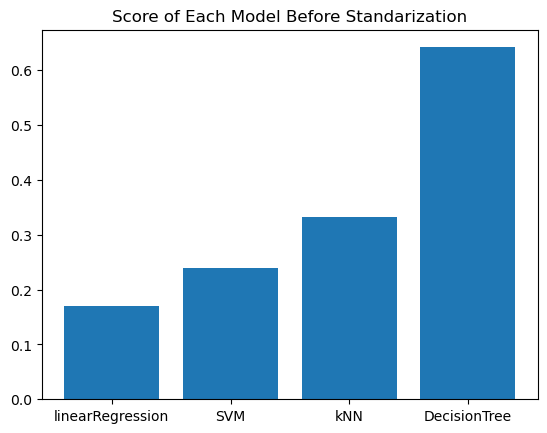

In [17]:
#plt.figure(figsize=(10, 16))
plt.bar(x=range(len(score)), height=score,
       tick_label=['linearRegression', 'SVM', 'kNN', 'DecisionTree'])
#_ = plt.xticks(rotation=30)
plt.title('Score of Each Model Before Standarization')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/score1.jpg')

### Standarization

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [58]:
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
# transform data 
X = scaler.fit_transform(X) 

In [59]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
y = scaler.fit_transform(np.array(y).reshape(-1, 1)) # do scaling

In [49]:
score = []

#### linear regression

In [50]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
score.append(model.score(X, y))

#### svm regression

In [51]:
from sklearn import svm
model = svm.SVR(kernel='rbf', gamma='auto')  ###'gamma = scale'
model.fit(X, y)
score.append(model.score(X, y))

#### kNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
ks = [1,3,5,7]
max_score = 0
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X, y)
    max_score = max(max_score, model.score(X, y))
score.append(max_score)

#### decision tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
model.fit(X, y)
#score.append(model.score(X, y))
model.score(X, y)

0.6485061601291863

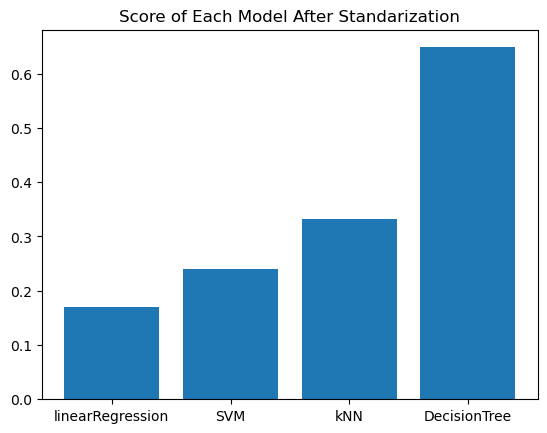

In [54]:
plt.bar(x=range(len(score)), height=score,
       tick_label=['linearRegression', 'SVM', 'kNN', 'DecisionTree'])
#_ = plt.xticks(rotation=30)
plt.title('Score of Each Model After Standarization')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/score2.jpg')

### Jacknife

In [70]:
X = df1.iloc[:, 2:28]
y = df1.iloc[:, 1]
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
model.fit(X, y)
score0 = model.score(X, y)
score0

0.6821425532402559

In [71]:
score_diff = []
for i in range(X.shape[1]):
    ii = [int(i) for i in np.linspace(0, (X.shape[1]-1), num=X.shape[1], endpoint = True)]#X.shape[1])]
    ii.pop(i)
    X_star = X.iloc[:, ii]
    model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
    model.fit(X_star, y)
    score_diff.append(score0 - model.score(X_star, y))
#    print(X.columns.to_list()[i], ":", score0 - model.score(X_star, y))

In [72]:
xx_ord = []
for i in np.argsort(score_diff):
    xx_ord.append(X.columns.to_list()[i])
xx_ord[-7:]

['lot',
 'BikeParking',
 'WiFi',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsPriceRange2',
 'NoiseLevel']

In [73]:
np.sort(score_diff)

array([0.00116615, 0.00179347, 0.00180311, 0.00207419, 0.00232177,
       0.00458756, 0.00664313, 0.01090793, 0.01158595, 0.01234555,
       0.0165306 , 0.02881349, 0.02935121, 0.03532658, 0.04053118,
       0.04103794, 0.04296888, 0.04500899, 0.04554764, 0.04866183,
       0.05278057, 0.05500436, 0.05701651, 0.06448221, 0.07589555,
       0.09822005])

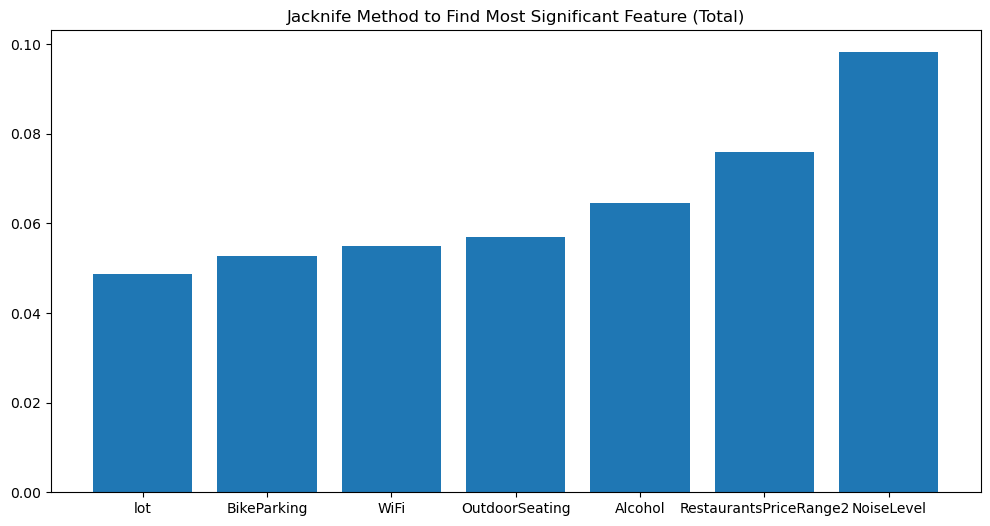

In [76]:
plt.figure(figsize=(12, 6))
plt.bar(x=range(7), height=np.sort(score_diff)[-7:],
       tick_label=xx_ord[-7:])
#_ = plt.xticks(rotation=90)
plt.title('Jacknife Method to Find Most Significant Feature (Total)')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/Jacknife.jpg')

In [77]:
### open bars
X_open = X[df1['is_open'] == 1]
y_open = y[df1['is_open'] == 1]

In [22]:
score = []

#### linear regression

In [72]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_open, y_open)
score.append(model.score(X_open, y_open))

#### svm regression

In [73]:
from sklearn import svm
model = svm.SVR(kernel='rbf', gamma='auto')  ###'gamma = scale'
model.fit(X_open, y_open)
score.append(model.score(X_open, y_open))

#### kNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
ks = [1,3,5,7]
max_score = 0
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X_open, y_open)
    max_score = max(max_score, model.score(X_open, y_open))
score.append(max_score)

#### decision tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
model.fit(X_open, y_open)
#score.append(model.score(X_open, y_open))
score00 = model.score(X_open, y_open)

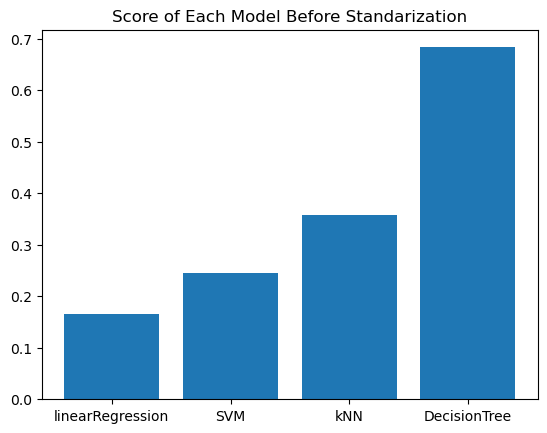

In [76]:
#plt.figure(figsize=(10, 16))
plt.bar(x=range(len(score)), height=score,
       tick_label=['linearRegression', 'SVM', 'kNN', 'DecisionTree'])
#_ = plt.xticks(rotation=30)
plt.title('Score of Each Model Before Standarization')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/score_open.jpg')

In [79]:
score00

0.7147497378401625

In [80]:
score_diff = []
for i in range(X_open.shape[1]):
    ii = [int(i) for i in np.linspace(0, (X_open.shape[1]-1), num=X_open.shape[1], endpoint = True)]
    ii.pop(i)
    X_star = X_open.iloc[:, ii]
    model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
    model.fit(X_star, y_open)
    score_diff.append(score00 - model.score(X_star, y_open))
#    print(X.columns.to_list()[i], ":", score0 - model.score(X_star, y))

In [81]:
xx_ord = []
for i in np.argsort(score_diff):
    xx_ord.append(X.columns.to_list()[i])
xx_ord[-5:]

['WiFi', 'OutdoorSeating', 'Alcohol', 'RestaurantsPriceRange2', 'NoiseLevel']

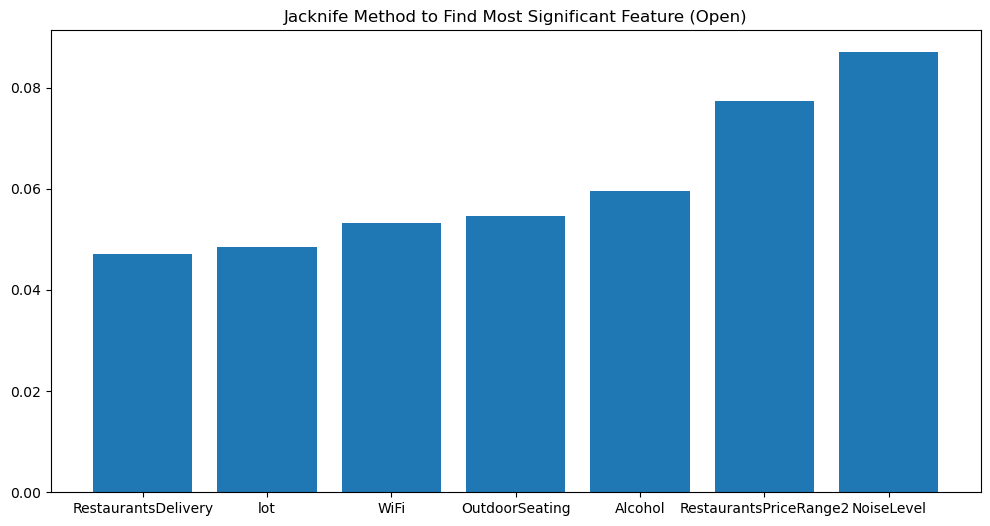

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(x=range(7), height=np.sort(score_diff)[-7:],
       tick_label=xx_ord[-7:])
#_ = plt.xticks(rotation=90)
plt.title('Jacknife Method to Find Most Significant Feature (Open)')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/Jacknife_open.jpg')

In [83]:
### open bars
X_dopen = X[df1['is_open'] == 0]
y_dopen = y[df1['is_open'] == 0]

In [84]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
model.fit(X_dopen, y_dopen)
score000 = model.score(X_dopen, y_dopen)
score000

0.766689461257906

In [85]:
score_diff = []
for i in range(X_dopen.shape[1]):
    ii = [int(i) for i in np.linspace(0, (X_dopen.shape[1]-1), num=X_dopen.shape[1], endpoint = True)]
    ii.pop(i)
    X_star = X_dopen.iloc[:, ii]
    model = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
    model.fit(X_star, y_dopen)
    score_diff.append(score000 - model.score(X_star, y_dopen))
#    print(X.columns.to_list()[i], ":", score0 - model.score(X_star, y))

In [86]:
xx_ord = []
for i in np.argsort(score_diff):
    xx_ord.append(X.columns.to_list()[i])
xx_ord[-5:]

['BikeParking',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsPriceRange2',
 'NoiseLevel']

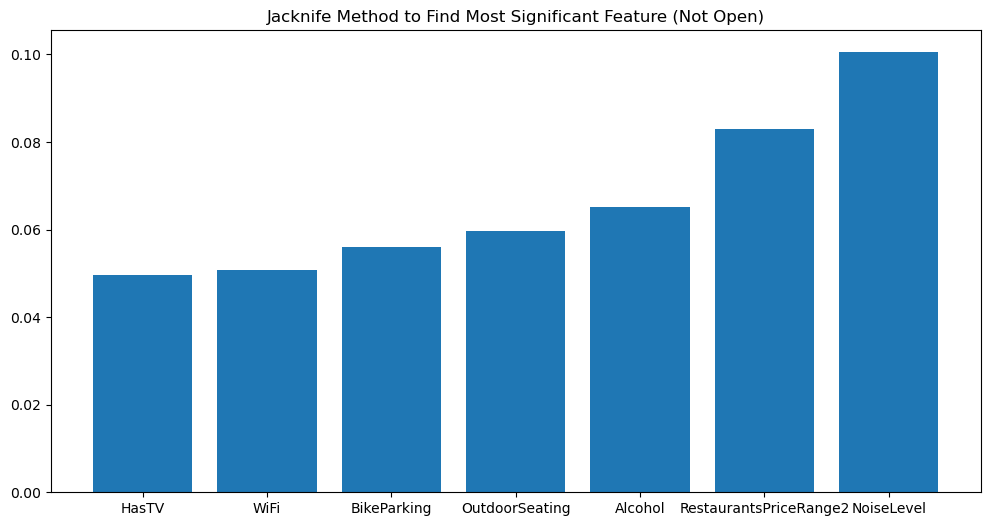

In [87]:
plt.figure(figsize=(12, 6))
plt.bar(x=range(7), height=np.sort(score_diff)[-7:],
       tick_label=xx_ord[-7:])
#_ = plt.xticks(rotation=90)
plt.title('Jacknife Method to Find Most Significant Feature (Not Open)')
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/Jacknife_Notopen.jpg')

# Review

In [3]:
df1 = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/barsAttr.csv')

In [66]:
#file2_path = 'E:/Fall_2023/stat628/module3/data/yelp_Fall2023/review.json'

#review = pd.read_json(file2_path, chunksize = 500000, lines= True)
#review_chunk = next(review)

In [2]:
file2_path = 'E:/Fall_2023/stat628/module3/data/yelp_Fall2023/review.json'

review_chunk = []

with open(file2_path, 'r', encoding='utf-8') as file:
    for line in file:
        json_object = json.loads(line)
        review_chunk.append(json_object)

In [6]:
review_chunk = pd.DataFrame(review_chunk)

In [7]:
review_chunk.to_csv('E:/Fall_2023/stat628/module3/attempt2/review.csv', index = False)

In [9]:
len(set(df1['business_id']) & set(review_chunk['business_id']))

14225

In [7]:
barReview = review_chunk[review_chunk['business_id'].isin(df1['business_id'])]

In [8]:
barReview.to_csv('E:/Fall_2023/stat628/module3/attempt2/barReview.csv', index = False)

In [9]:
barReview

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01
...,...,...,...,...,...,...,...,...,...
6990255,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25 21:00:15
6990260,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0,2,0,2,"*Later Yelp* I've only been here once, but I l...",2014-11-03 14:45:46
6990261,34M6AEbY84174OBerbm96Q,i48cHEyRBl5g9_npYIG7dA,ReVpjIDupK_VMPn7ZxPvOQ,4.0,2,0,1,This place never fails the food is absolutely ...,2019-08-21 20:49:13
6990272,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01


In [34]:
barReview = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/barReview.csv')

In [29]:
barReview = barReview[barReview['business_id'].isin(df1['business_id'])]

In [33]:
barReview.to_csv('E:/Fall_2023/stat628/module3/attempt2/barReview.csv', index = False)

In [35]:
barReview

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
2,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
3,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
4,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01
...,...,...,...,...,...,...,...,...,...
1741514,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25 21:00:15
1741515,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0,2,0,2,"*Later Yelp* I've only been here once, but I l...",2014-11-03 14:45:46
1741516,34M6AEbY84174OBerbm96Q,i48cHEyRBl5g9_npYIG7dA,ReVpjIDupK_VMPn7ZxPvOQ,4.0,2,0,1,This place never fails the food is absolutely ...,2019-08-21 20:49:13
1741517,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5.0,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
